In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [164]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.decomposition import PCA
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [7]:
# Data Preparation

In [5]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
722,62,male,37.40,0,no,southwest,12979.3580
1268,20,female,33.30,0,no,southwest,1880.4870
373,26,male,32.90,2,yes,southwest,36085.2190
850,37,female,30.78,0,yes,northeast,37270.1512
944,62,male,39.93,0,no,southeast,12982.8747


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [11]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
cat = data.select_dtypes("object").columns.to_list()
cat

['sex', 'smoker', 'region']

In [20]:
num = [f for f in data.columns if f  not in cat]
num

['age', 'bmi', 'children', 'charges']

In [22]:
for f in cat:
    print(f"{f}: {data[f].unique()}",end='\n'+'_'*50+'\n')

sex: ['female' 'male']
__________________________________________________
smoker: ['yes' 'no']
__________________________________________________
region: ['southwest' 'southeast' 'northwest' 'northeast']
__________________________________________________


In [23]:
for f in num:
    print(f"{f}:\n\tMin: {data[f].min()}\tMax:{data[f].max()}",end='\n'+'_'*50+'\n')

age:
	Min: 18	Max:64
__________________________________________________
bmi:
	Min: 15.96	Max:53.13
__________________________________________________
children:
	Min: 0	Max:5
__________________________________________________
charges:
	Min: 1121.8739	Max:63770.42801
__________________________________________________


In [24]:
# Data Preprocessing

In [136]:
df = data.copy()

In [137]:
df.drop_duplicates(inplace=True)

In [32]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337],
      dtype='int64', length=1337)

In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [34]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [110]:
# Data Visualization

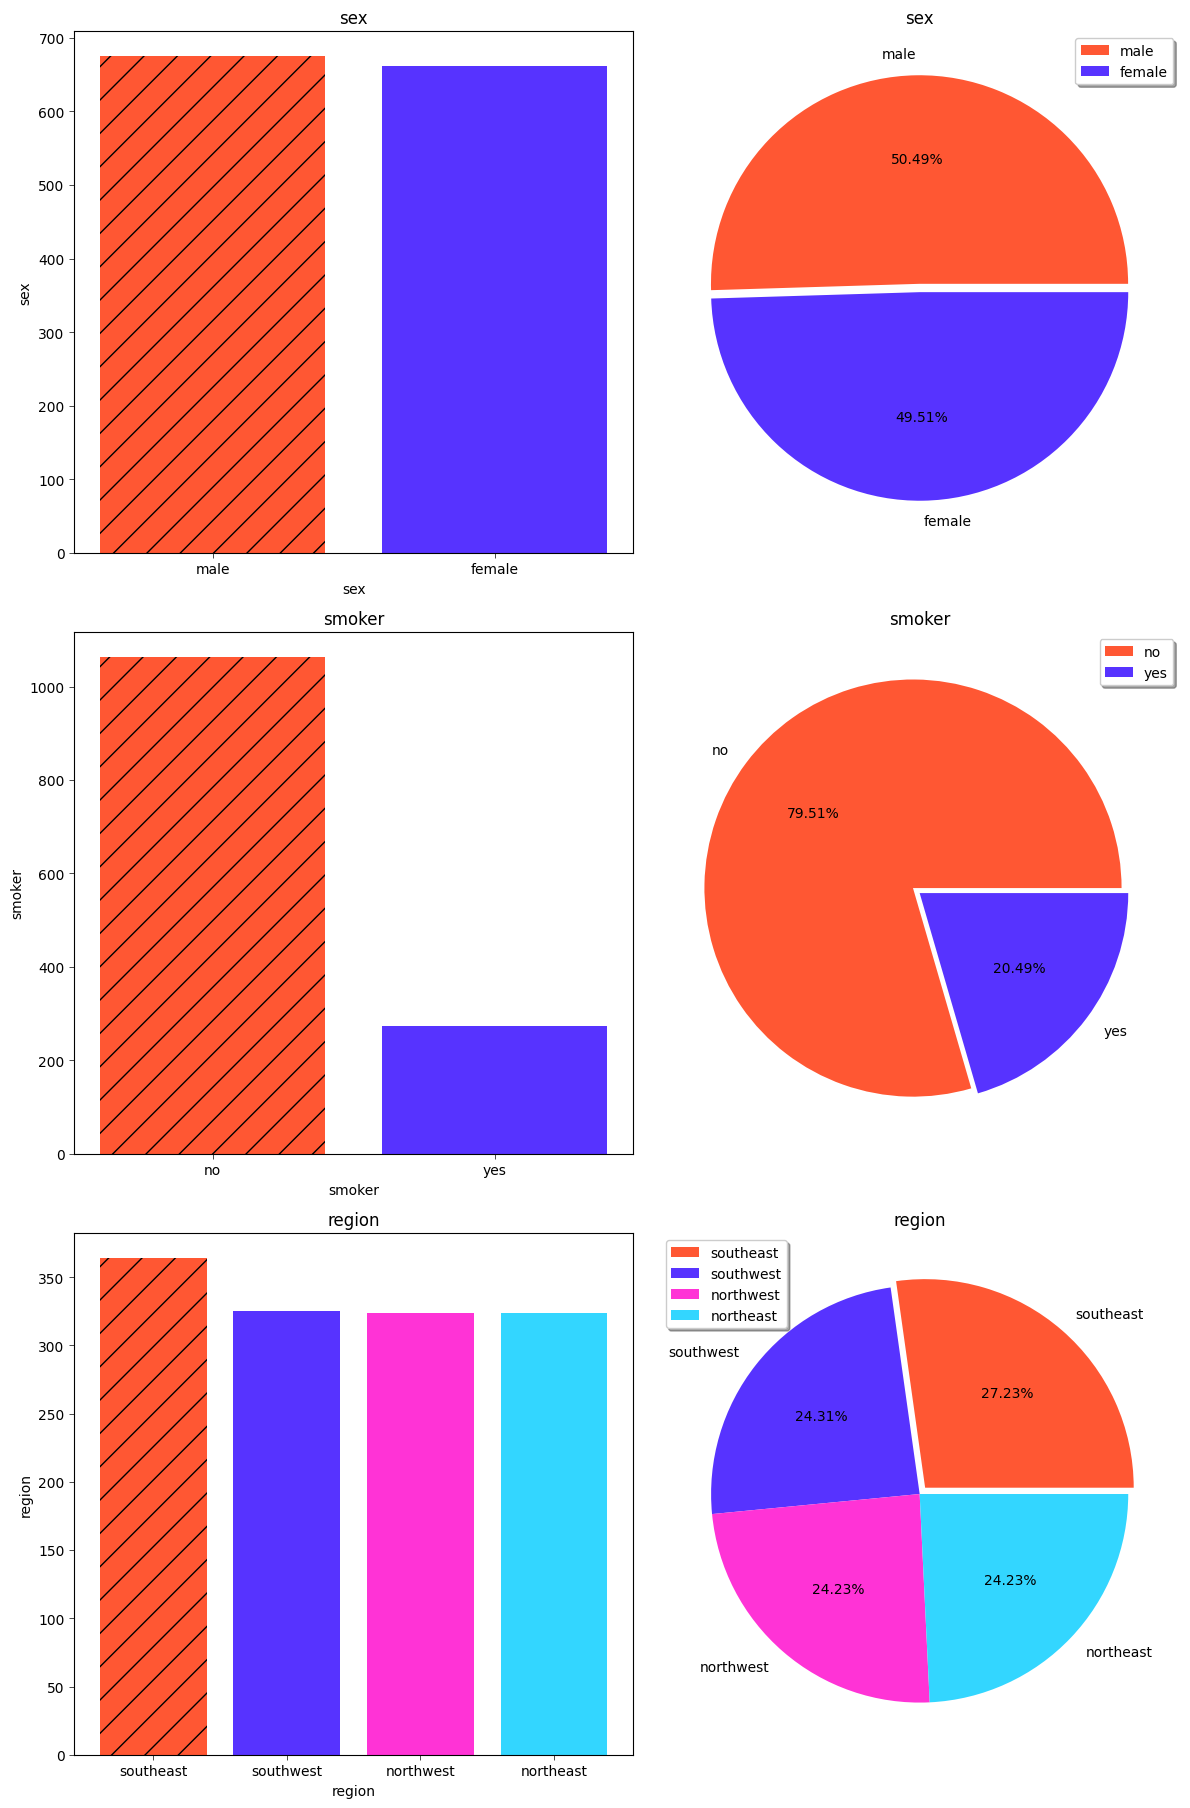

In [56]:
c = [ '#FF5733', '#5733FF', '#FF33D6', '#33D6FF',
    '#FFA500', '#FF69B4', '#6495ED', '#2E8B57', '#B22222',
    '#FFD700', '#6A5ACD', '#FF6347', '#800080', '#008080',
    '#ADFF2F', '#8B008B', '#FF4500', '#8A2BE2', '#008000']
f,ax = plt.subplots(3,2,figsize=(12,18))
for i,f in enumerate(cat):
    ax[i,0].bar(x=df[f].value_counts().index,height=df[f].value_counts(),color=c,label=df[f].value_counts().index)[0].set_hatch('/')
    ax[i,0].set_title(f)
    ax[i,0].set_xlabel(f)
    ax[i,0].set_ylabel(f)
    ax[i,0].bar(x=df[f].value_counts().index,height=df[f].value_counts(),color=c,label=df[f].value_counts().index)[0].set_hatch('/')
    ax[i,0].tick_params(labelsize=10, width=0.5)
    ax[i,0].xaxis.offsetText.set_fontsize(6)
    ax[i,0].yaxis.offsetText.set_fontsize(6)
    ax[i,1].pie(x=df[f].value_counts().values,explode=[0.04  if x == 0 else 0 for x in range(data[f].value_counts().shape[0])],labels = df[f].value_counts().index,\
    colors = c,autopct = '%.2f%%')
    ax[i,1].set_title(f)
    ax[i,1].legend(shadow=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

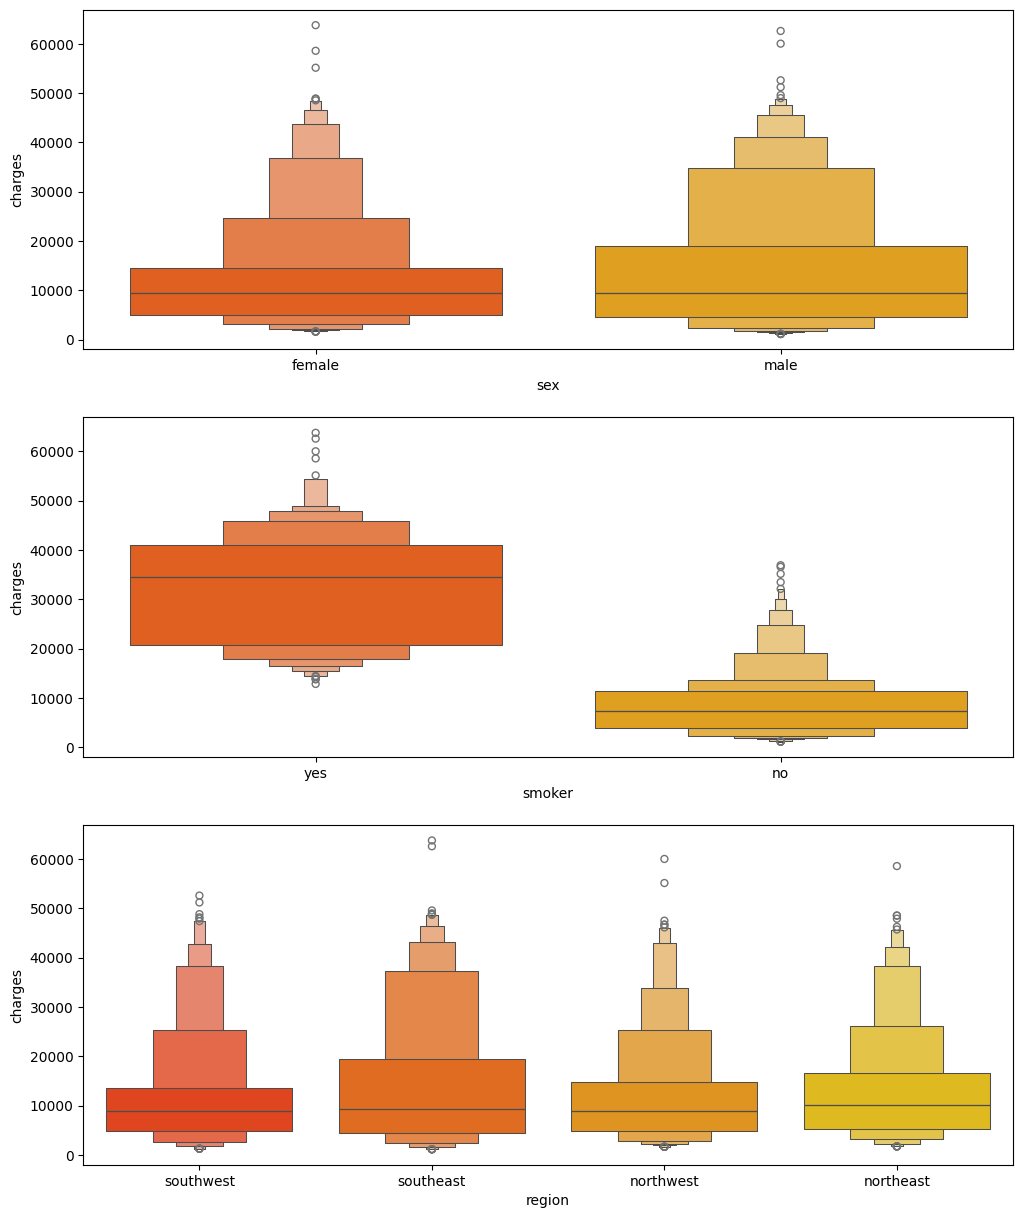

In [62]:
i = 1
plt.figure(figsize=(12,15))
for f in cat:
    plt.subplot(3,1,i)
    sns.boxenplot(data=df,x=f,y='charges',palette='autumn')
    i += 1
plt.show()

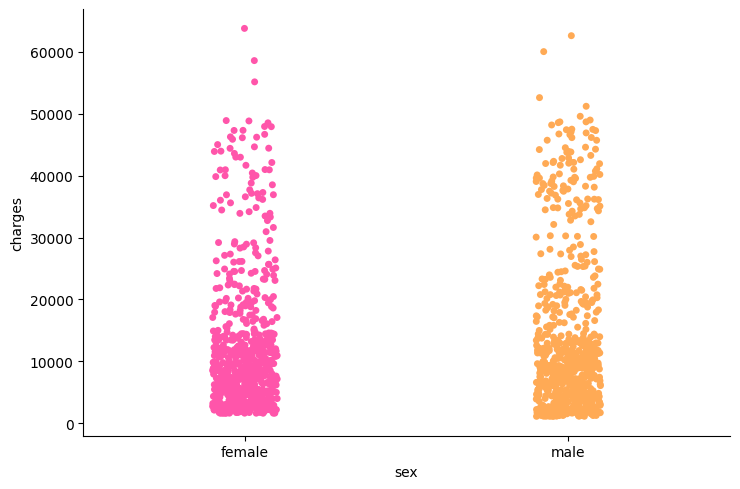

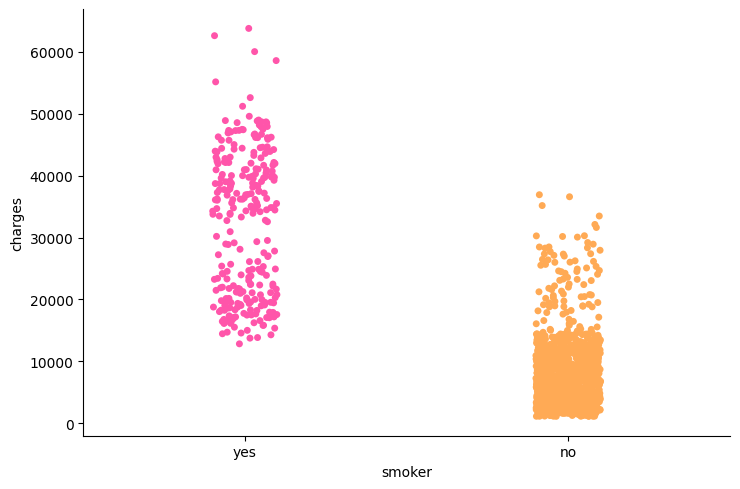

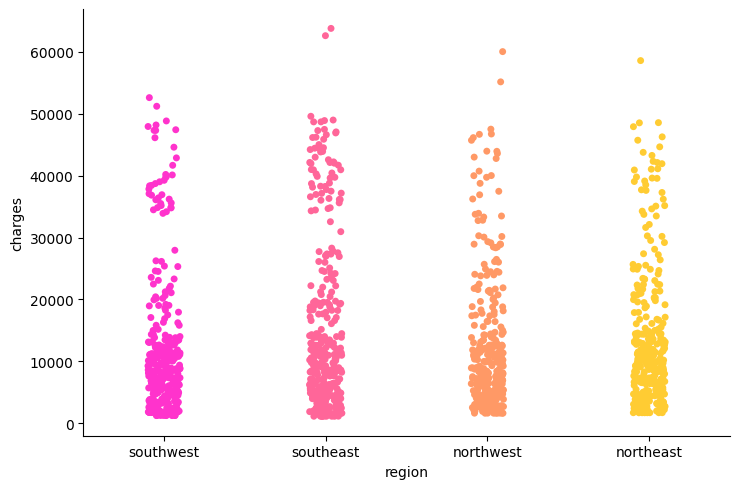

In [69]:
for f in cat:
    sns.catplot(data=df,x=f,y='charges',palette='spring',aspect=1.5)

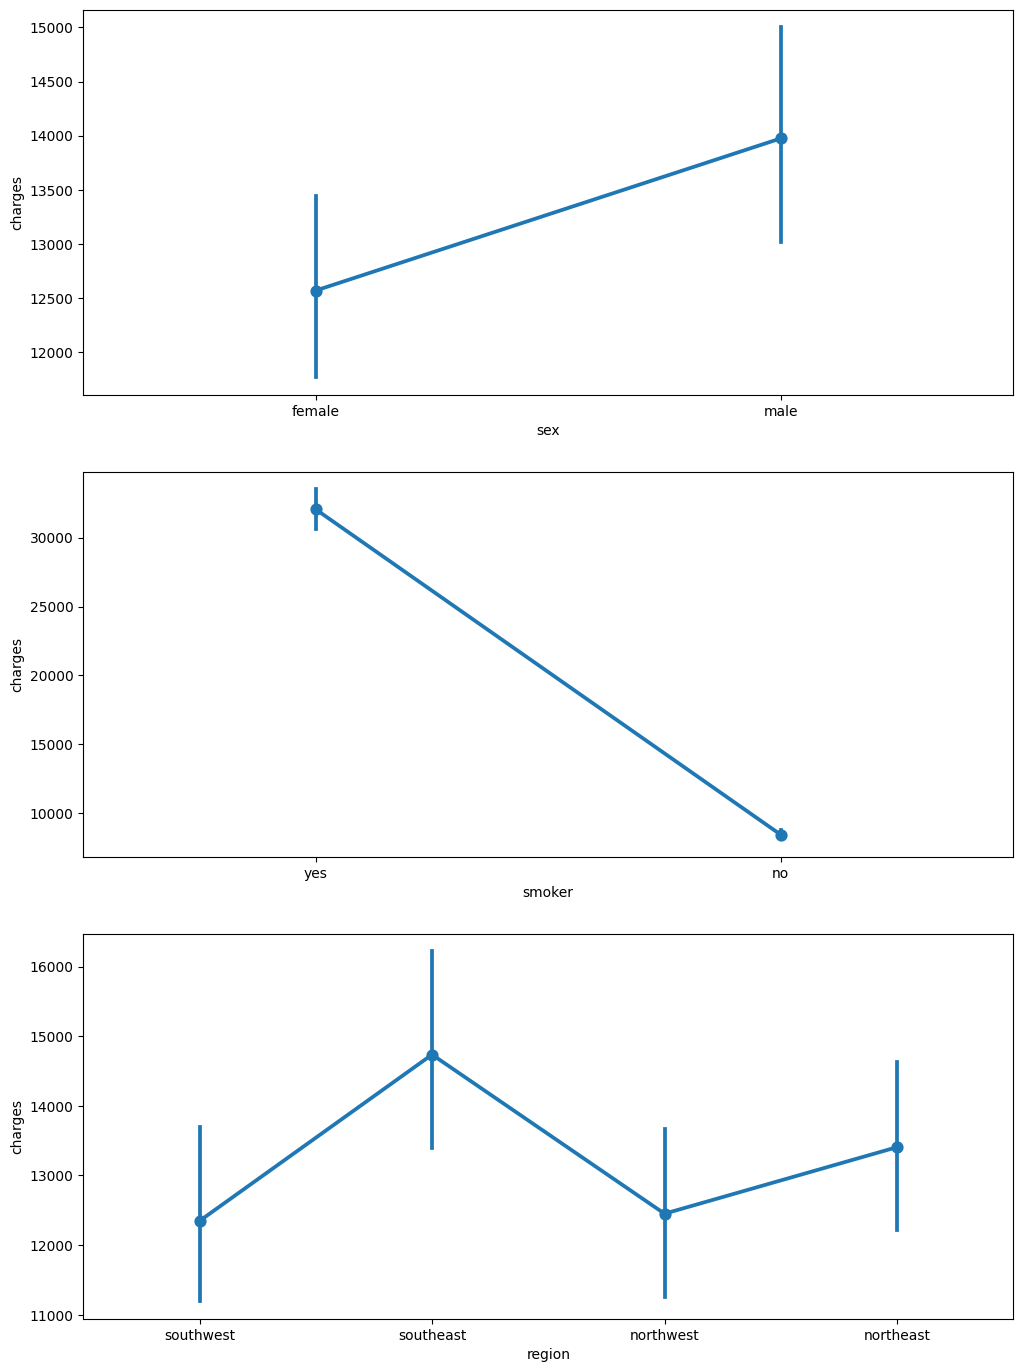

In [79]:
i = 0
f,ax = plt.subplots(3,1,figsize=(12,17))
for f in cat:
    sns.pointplot(data=df,x=f,y='charges',ax=ax[i])
    i += 1
plt.show()

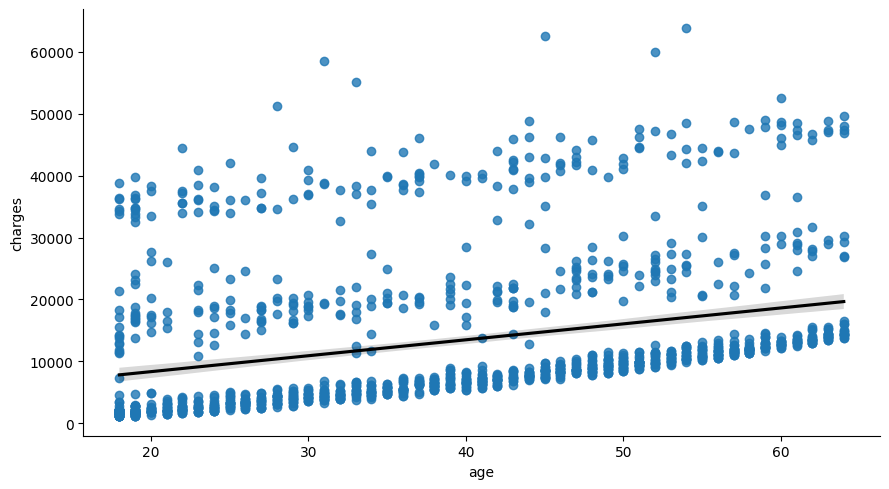

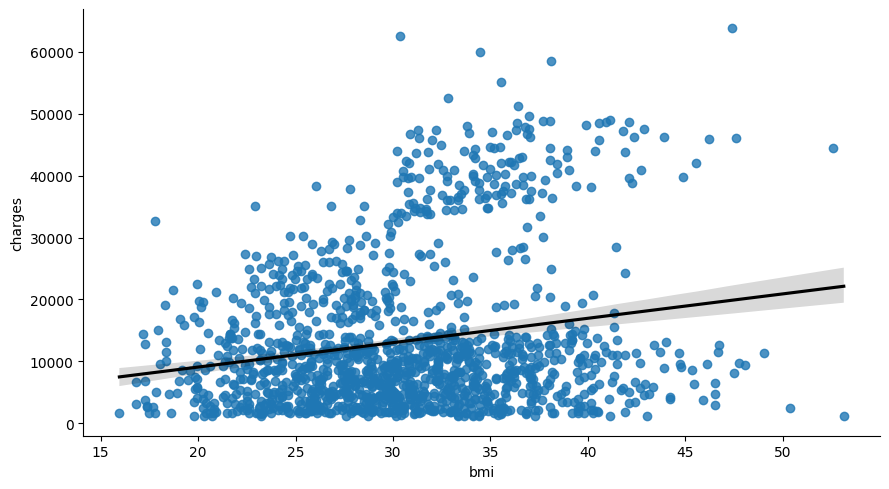

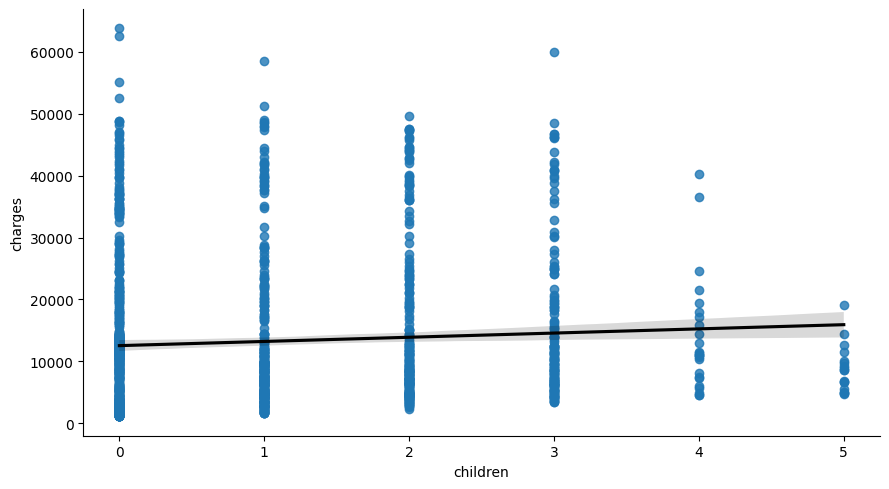

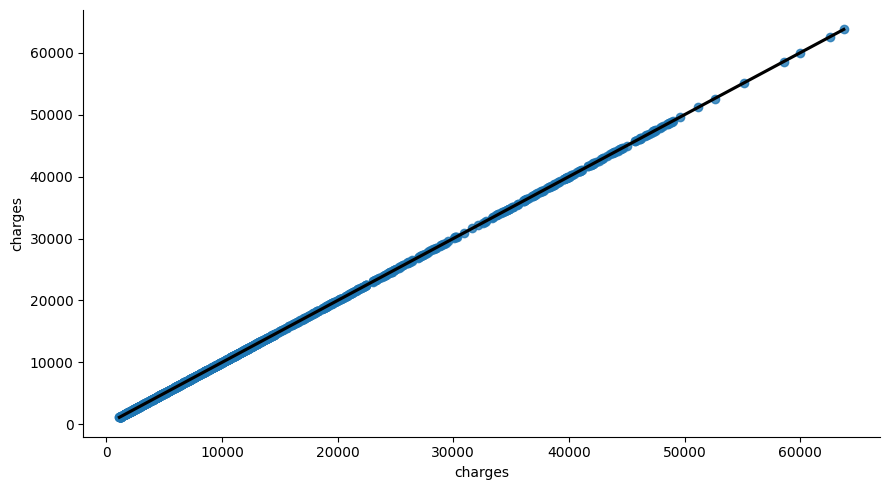

In [86]:
for f in num:
    sns.lmplot(data=df,x=f,y='charges',line_kws={"color":'black'},aspect = 1.8)

# Let's Draw Some Conclusions about the Above Visual:
- As age increases, the charges tend to increase.
- As the body mass index increases, charges tend to increase, which makes sense because overweight individuals often have more health issues.
- When the number of children increases, medical costs tend to decrease because the money tends to be allocated to children, which leads to neglecting health.

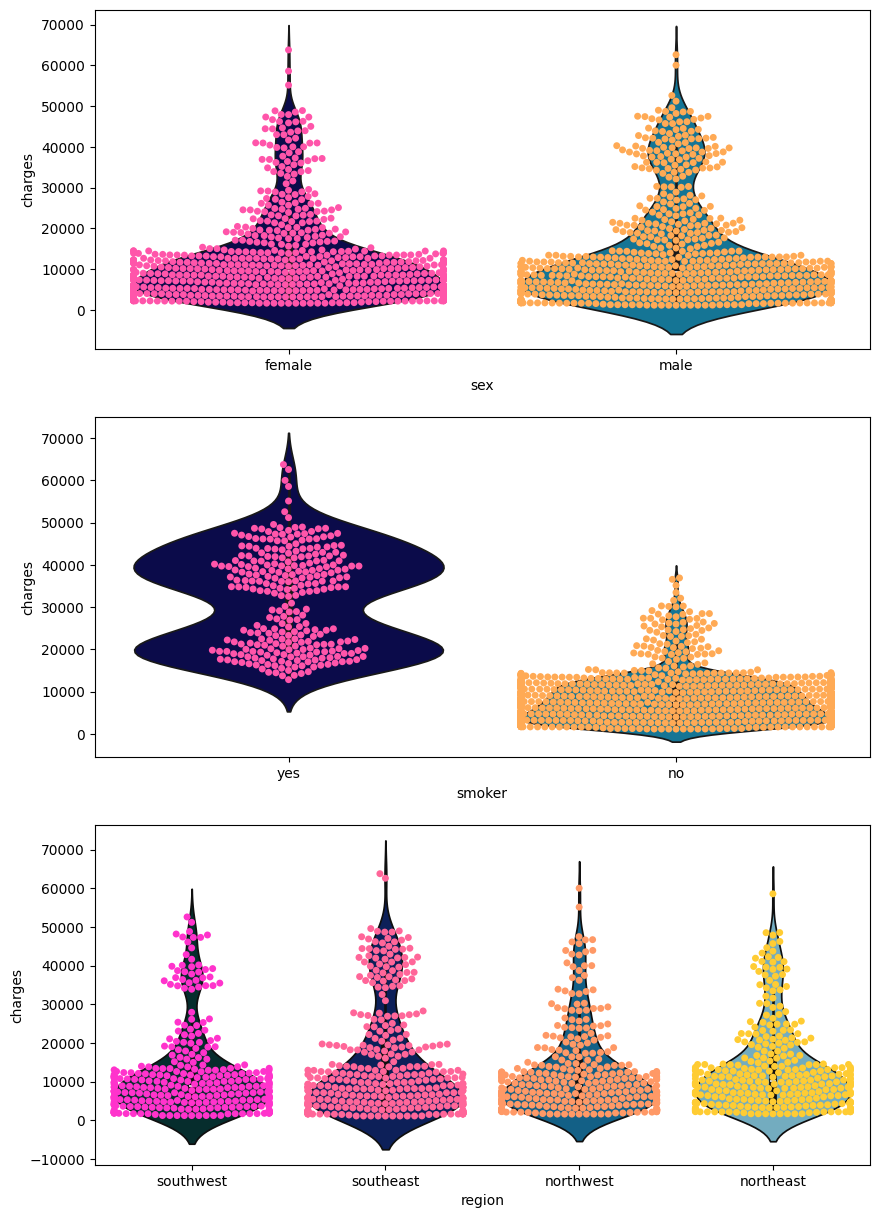

In [92]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.swarmplot(data=df,y='charges',x='sex',palette='spring')
sns.violinplot(data=df,y='charges',x='sex',palette='ocean')
plt.subplot(3,1,2)
sns.swarmplot(data=df,y='charges',x='smoker',palette='spring')
sns.violinplot(data=df,y='charges',x='smoker',palette='ocean')
plt.subplot(3,1,3)
sns.swarmplot(data=df,y='charges',x='region',palette='spring')
sns.violinplot(data=df,y='charges',x='region',palette='ocean')
plt.show()

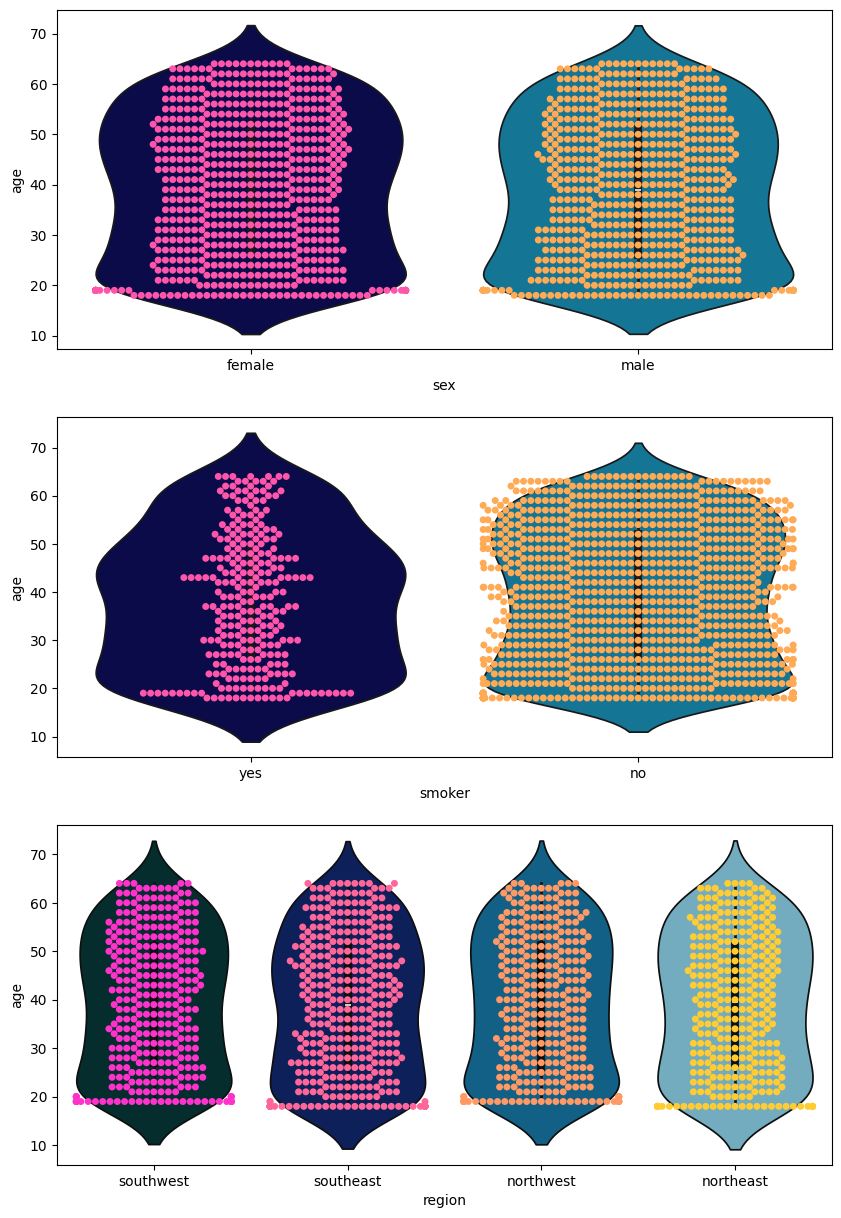

In [93]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.swarmplot(data=df,y='age',x='sex',palette='spring')
sns.violinplot(data=df,y='age',x='sex',palette='ocean')
plt.subplot(3,1,2)
sns.swarmplot(data=df,y='age',x='smoker',palette='spring')
sns.violinplot(data=df,y='age',x='smoker',palette='ocean')
plt.subplot(3,1,3)
sns.swarmplot(data=df,y='age',x='region',palette='spring')
sns.violinplot(data=df,y='age',x='region',palette='ocean')
plt.show()

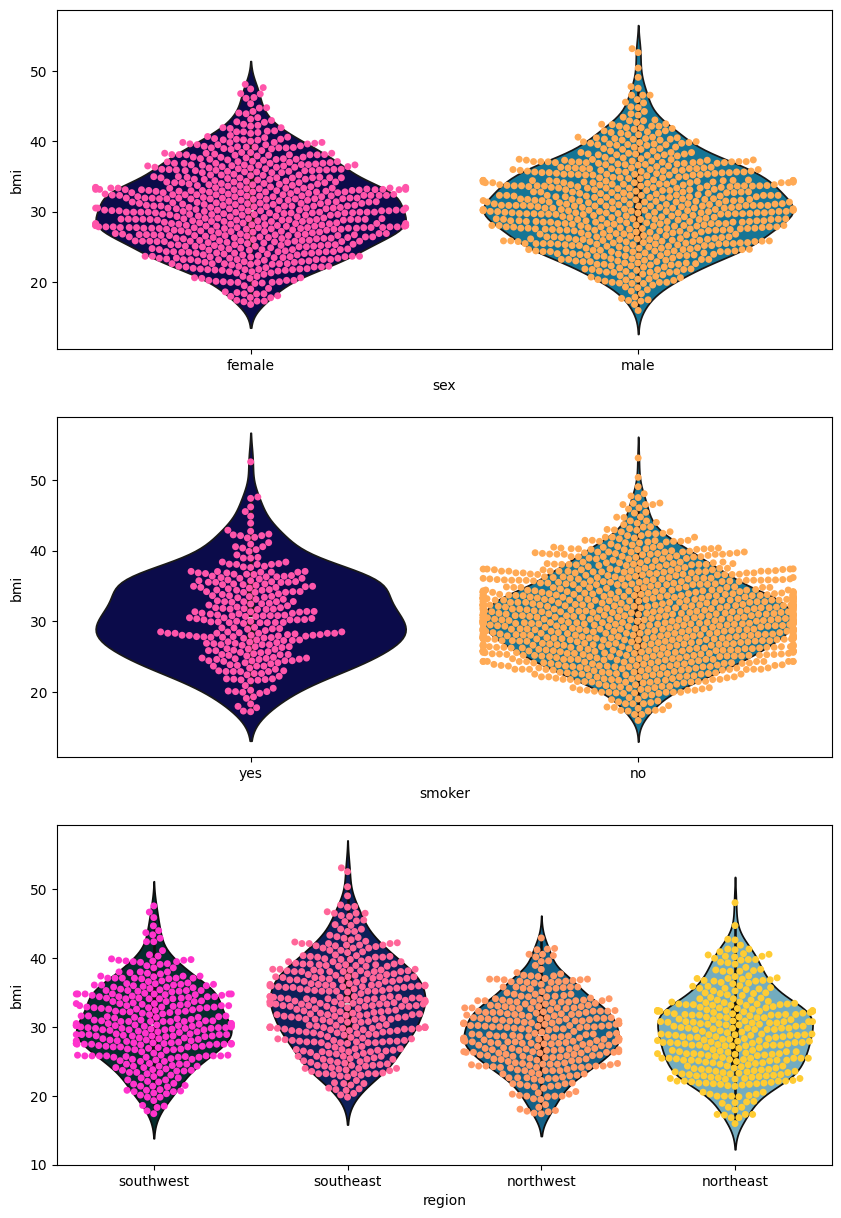

In [94]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.swarmplot(data=df,y='bmi',x='sex',palette='spring')
sns.violinplot(data=df,y='bmi',x='sex',palette='ocean')
plt.subplot(3,1,2)
sns.swarmplot(data=df,y='bmi',x='smoker',palette='spring')
sns.violinplot(data=df,y='bmi',x='smoker',palette='ocean')
plt.subplot(3,1,3)
sns.swarmplot(data=df,y='bmi',x='region',palette='spring')
sns.violinplot(data=df,y='bmi',x='region',palette='ocean')
plt.show()

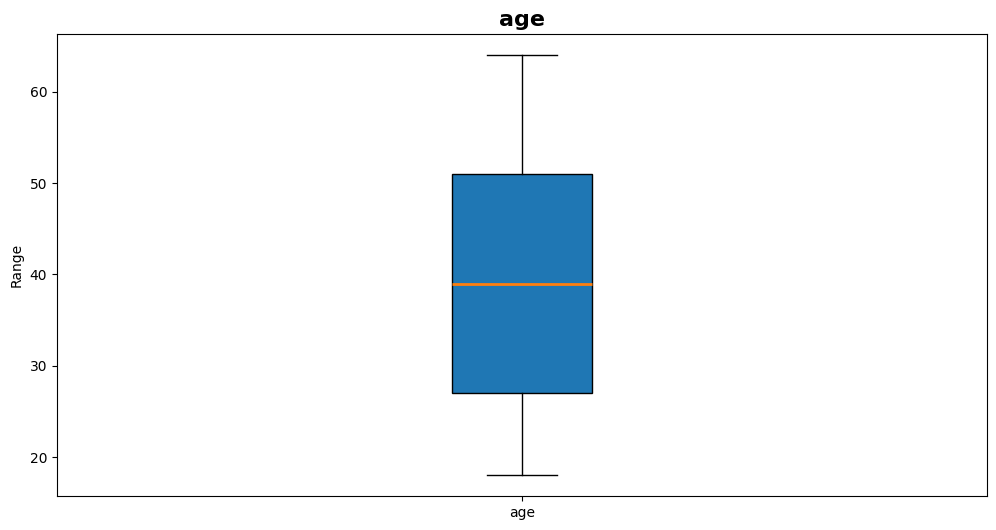

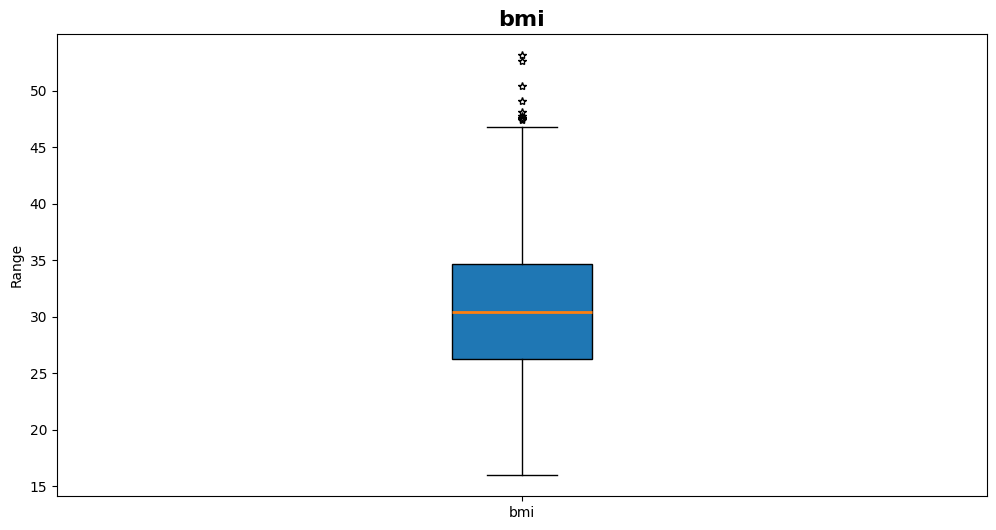

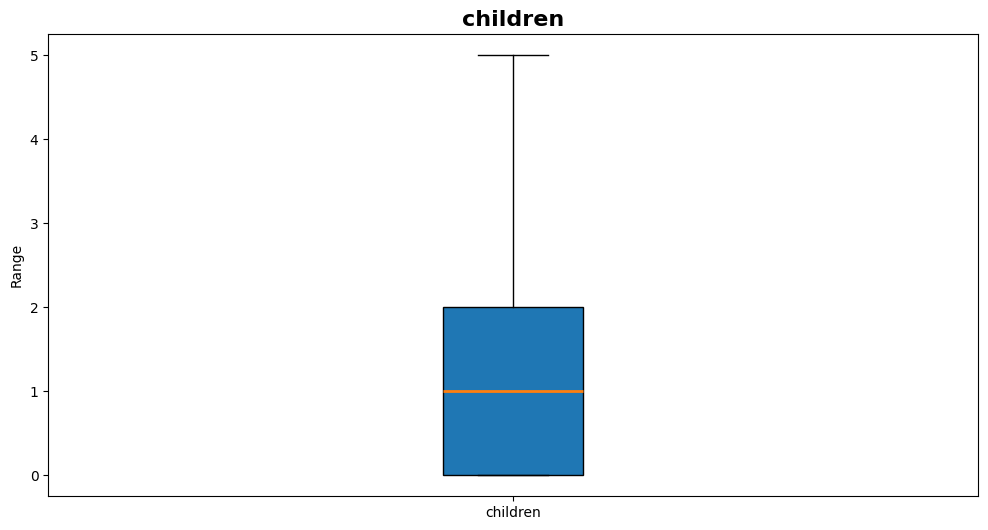

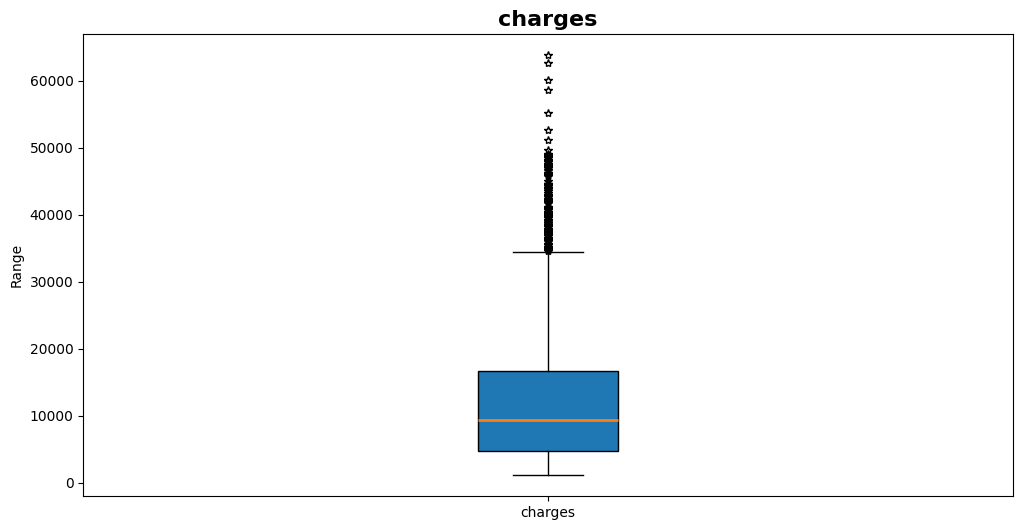

In [101]:
for f in num:
     plt.figure(figsize=(12,6))
     plt.title(f,fontsize=16,weight='bold')
     plt.boxplot(x=df[f],sym='*',patch_artist=True,medianprops={"linewidth":2})
     plt.xticks([1],[f])
     plt.ylabel("Range")
plt.show()

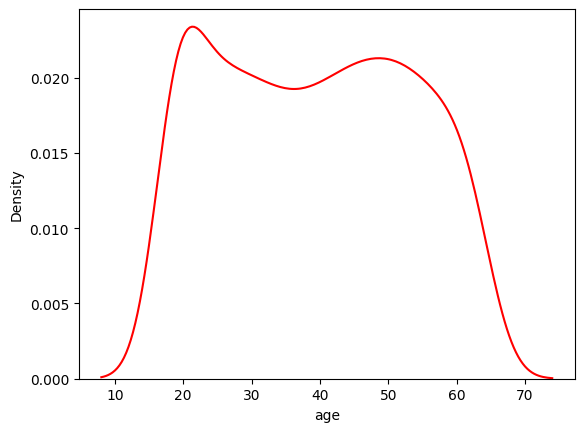

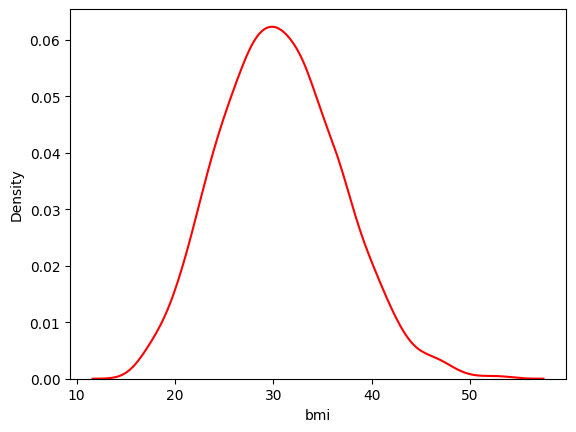

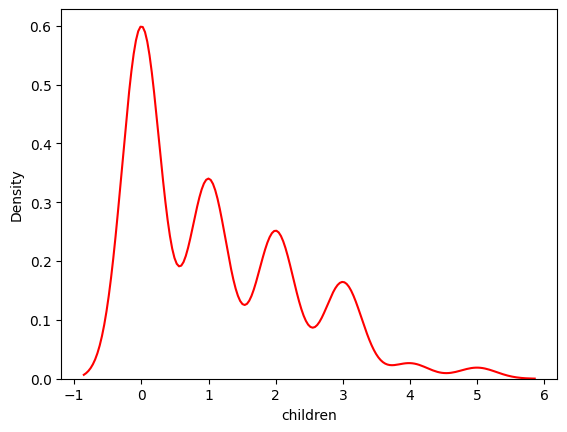

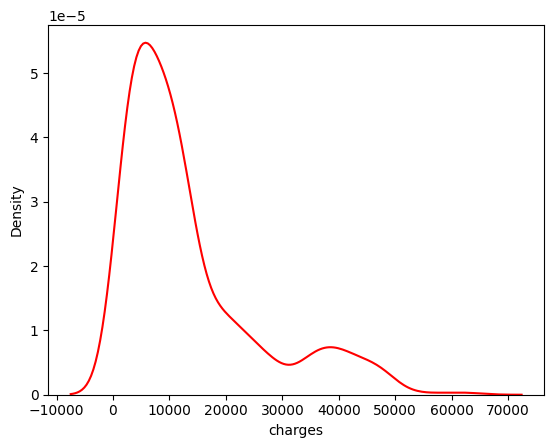

In [103]:
for f in num:
    sns.kdeplot(data=df,x=f,color='red')
    plt.show()

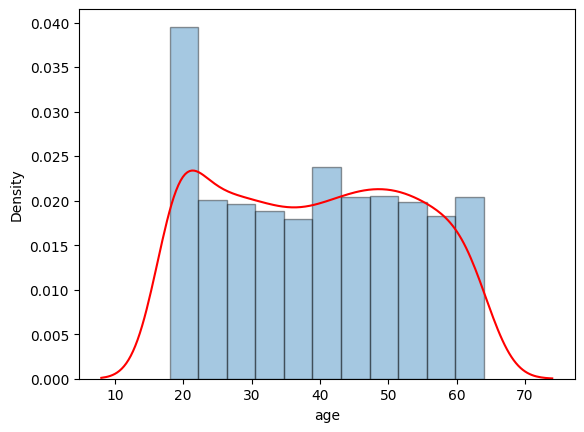

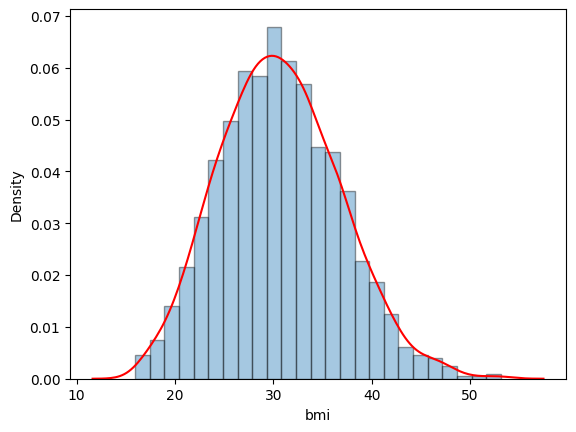

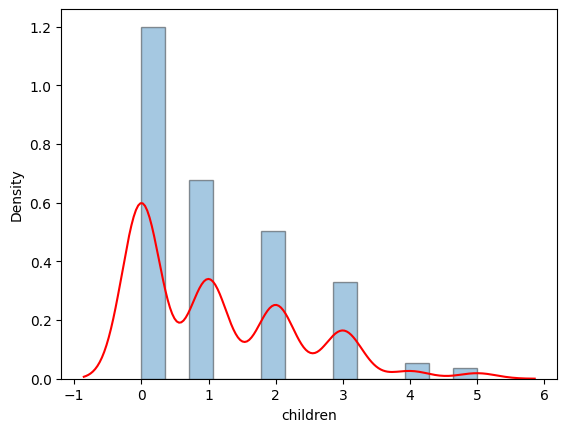

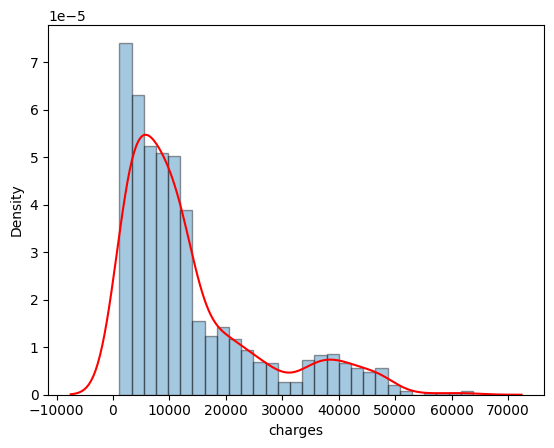

In [107]:
for f in num:
    sns.distplot(a=df[f],kde_kws={"color":"red"},hist_kws={"edgecolor":"black"})
    plt.show()

In [111]:
# Feature Selection and Manipulation

In [138]:
oe = OrdinalEncoder()
df[["smoker",'sex']] = oe.fit_transform(df[["smoker",'sex']])

In [139]:
dummy = pd.get_dummies(df["region"],drop_first=True,dtype=int)
df = pd.concat([df,dummy],axis=1)

In [140]:
df.drop("region",axis=1,inplace=True)

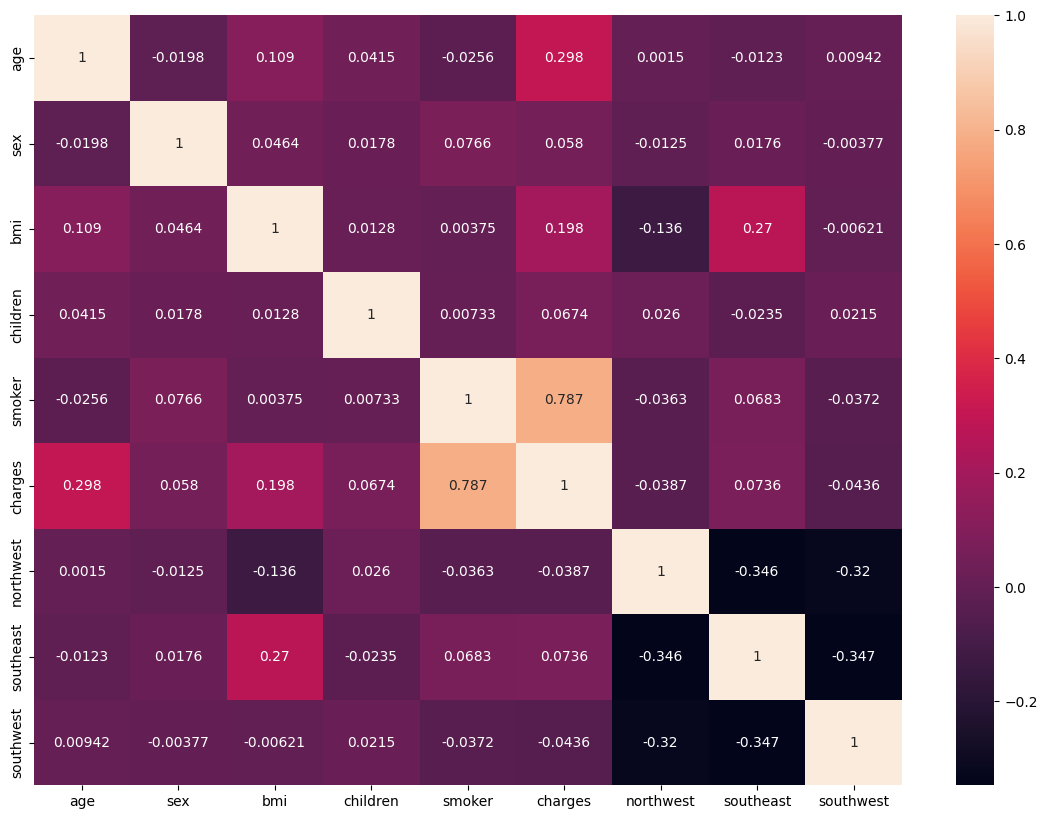

In [121]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.3g')
plt.show()

In [122]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("charges",axis=1),df["charges"],test_size=0.2)

In [128]:
def selection():
    acc = []
    for i in range(1,9):
        skb = SelectKBest(score_func=mutual_info_regression,k = i)
        skb.fit(x_train,y_train)
        selected_x_train = skb.transform(x_train)
        selected_x_test = skb.transform(x_test)
        gbr = GradientBoostingRegressor()
        gbr.fit(selected_x_train,y_train)
        acc.append({i:gbr.score(selected_x_test,y_test)})
    return acc

In [129]:
acc = selection()
acc

[{1: 0.06850216279197086},
 {2: 0.6947714742421846},
 {3: 0.6952921986862752},
 {4: 0.7071797954797915},
 {5: 0.8702836604401629},
 {6: 0.8683291709936375},
 {7: 0.8680407693162665},
 {8: 0.8678945146040213}]

In [130]:
skb = SelectKBest(score_func=mutual_info_regression,k = 5)
skb.fit(x_train,y_train)
selected_x_train = skb.transform(x_train)
selected_x_test = skb.transform(x_test)
gbr = GradientBoostingRegressor()
gbr.fit(selected_x_train,y_train)
print(gbr.score(selected_x_test,y_test))

0.870637079369538


In [144]:
cols = skb.get_feature_names_out()
cols = np.append(cols,"charges")

In [145]:
df = df[cols]

In [146]:
df

,age,sex,bmi,children,smoker,charges
0,19,0.0,27.900,0,1.0,16884.92400
1,18,1.0,33.770,1,0.0,1725.55230
2,28,1.0,33.000,3,0.0,4449.46200
3,33,1.0,22.705,0,0.0,21984.47061
4,32,1.0,28.880,0,0.0,3866.85520
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,10600.54830
1334,18,0.0,31.920,0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,1629.83350
1336,21,0.0,25.800,0,0.0,2007.94500


In [148]:
from sklearn import set_config 
set_config(display='diagram')

In [221]:
def eval(pred):
    print(f"Mean Squared Error: {mean_squared_error(y_test,pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test,pred)}")
    print(f"R2 Score: {r2_score(y_test,pred)}")

In [236]:
acc = []
for i in range(51):
    x_train,x_test,y_train,y_test = train_test_split(df.drop("charges",axis=1),df["charges"],test_size=0.2,random_state=i)
    gbr1 = GradientBoostingRegressor()
    gbr1.fit(x_train,y_train)
    acc.append({i:gbr1.score(x_test,y_test)})
acc

[{0: 0.8491354139567177},
 {1: 0.857807253922162},
 {2: 0.8527540907629501},
 {3: 0.8767504561897497},
 {4: 0.8637199243897737},
 {5: 0.8392037844155107},
 {6: 0.8598591961858796},
 {7: 0.8456302233072073},
 {8: 0.8278247452919085},
 {9: 0.8044897524628595},
 {10: 0.8247251546178754},
 {11: 0.9122553370396567},
 {12: 0.8553773052897277},
 {13: 0.8865155523382594},
 {14: 0.8336028126278289},
 {15: 0.8821884458573443},
 {16: 0.8505178404868073},
 {17: 0.8575772301264915},
 {18: 0.8624907538802544},
 {19: 0.8782968343792086},
 {20: 0.9038879061016829},
 {21: 0.8233626207682915},
 {22: 0.8432590415401796},
 {23: 0.8382427956080996},
 {24: 0.8698076028075097},
 {25: 0.8607967535721148},
 {26: 0.8632757890831672},
 {27: 0.7927874655154635},
 {28: 0.8481251017442861},
 {29: 0.8381643916790849},
 {30: 0.8558975738298719},
 {31: 0.8460510743279177},
 {32: 0.8991878279557639},
 {33: 0.864833166843703},
 {34: 0.8391405569302101},
 {35: 0.844962418665336},
 {36: 0.8599501163185482},
 {37: 0.837120

In [252]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("charges",axis=1),df["charges"],test_size=0.2,random_state=50)

In [253]:
pipe = Pipeline(steps=[("gbr",GradientBoostingRegressor())])

In [254]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('gbr', GradientBoostingRegressor())])

In [255]:
pred = pipe.predict(x_test)

In [256]:
eval(pred)

Mean Squared Error: 13333185.804897496
Mean Absolute Error: 2197.917687113628
R2 Score: 0.9139279687576126


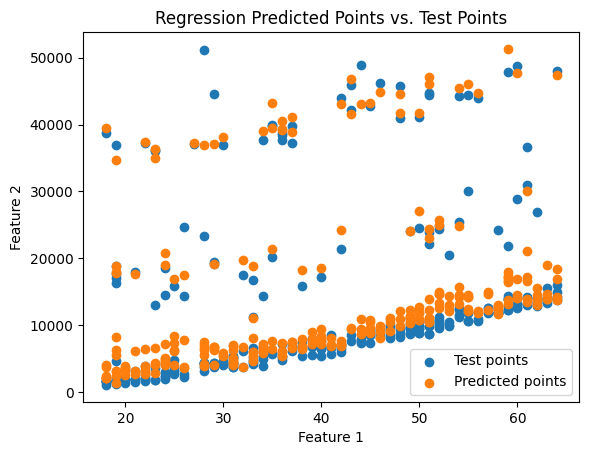

In [258]:
plt.scatter(x_test.iloc[:, 0], y_test,label='Test points')
plt.scatter(x_test.iloc[:, 0], pred,label='Predicted points')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Regression Predicted Points vs. Test Points')
plt.legend()
plt.show()

In [264]:
def my_pipe(model,model_name):
    pipe = Pipeline([(model_name,model)])
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    eval(pred)
    return pred

In [265]:
rf = RandomForestRegressor()
rf_pred = my_pipe(rf,"Random Forest")

Mean Squared Error: 15869781.812511714
Mean Absolute Error: 2363.502530661381
R2 Score: 0.8975530397637865


In [268]:
dt = DecisionTreeRegressor()
_ = my_pipe(dt,"Decision Tree")

Mean Squared Error: 31326922.295528904
Mean Absolute Error: 2639.500300485074
R2 Score: 0.7977698748068008


In [269]:
import pickle 

In [270]:
with open('pipeline.pkl',"wb") as f:
    pickle.dump(pipe,f)